In this document we&rsquo;ll work through a simple approach to estimating
Constant Frisch Elasticity (CFE) demand systems.

There are two prerequisites; the first is the `CFEDemands` python
module.  You may have this already, but if not it  can be installed with a simple:



In [1]:
#!pip install -r requirements.txt

The second prerequisite is a dataset including detailed information on
household expenditures and characteristics.  The structure of that
dataset is detailed in the next section.



## Data



Consider the case in which the data are saved in a google sheet; we&rsquo;ll
turn data from these into `pandas` dataframes.  
There are limits on the allowable size of google sheets (5 million
cells when I last checked), so if your dataset is larger than this you&rsquo;ll need some other
mechanism to get your data into such dataframes.  Even in this latter
case you&rsquo;ll want your dataframes to have a structure that matches the
description given below.



### Structure of the Spreadsheet



An example spreadsheet with data for Uganda can be found at
[https://docs.google.com/spreadsheets/d/1yVLriVpo7KGUXvR3hq_n53XpXlD5NmLaH1oOMZyV0gQ/](https://docs.google.com/spreadsheets/d/1yVLriVpo7KGUXvR3hq_n53XpXlD5NmLaH1oOMZyV0gQ/)

This spreadsheet consists of several worksheets, labeled &ldquo;RDI&rdquo;, &ldquo;FCT&rdquo;,
&ldquo;Household Characteristics&rdquo;, &ldquo;Prices&rdquo;, and a series of different years of food &ldquo;Expenditures&rdquo;.

Each worksheet has the initial three columns labeled &ldquo;i&rdquo;, &ldquo;t&rdquo;, and
&ldquo;m&rdquo;; together these identify an observation uniquely.  The column &ldquo;i&rdquo;
should include a household id; the column &ldquo;t&rdquo; should include an
indicator for the year or period (for those of you with
cross-sectional data these will all take a common value, e.g., 2019);
the column &ldquo;m&rdquo; should be an indicator of &ldquo;market&rdquo;, which may be a
region identifier, or may take a single value (e.g., &ldquo;Uganda&rdquo;).

The triple (i,t,m) will serve as the index of some constructed
dataframes.  It is important not to have **too** many different values
for &ldquo;m&rdquo; (unless you have lots of data and RAM to play with).

Beyond the first three columns, the &ldquo;Expenditures&rdquo; worksheet for a given year should
have one column for each category of expenditures (e.g., &ldquo;Beans&rdquo;, &ldquo;Beef&rdquo;, &ldquo;Beer&rdquo;,&#x2026;).

Beyond the first three columns, the &ldquo;Household Characteristics&rdquo; should
have columns corresponding to different elements of the vector of
observable characteristics $z$.  If the data permit, I recommend
constructing observables that match what I have in these data:
namely numbers of different children by age and sex, along with the
logarithm of total household size (&ldquo;log HSize&rdquo;).



### From Sheet to DataFrame to Regression Object



We begin by defining a dictionary that contains the spreadsheet key. 
One is provided for the Ugandan example that I wish to work
through.



In [2]:
Uganda_Data = '1yVLriVpo7KGUXvR3hq_n53XpXlD5NmLaH1oOMZyV0gQ'

In [3]:
Guatemala_Data = '1x6A8fRQXzrdhzOV2UZTxzqhFfA-pt7T_sTmMNcQu_VQ'

With the spreadsheet defined , grab it and define a couple of
dataframes. (Sheets should be shared with `students@eep153.iam.gserviceaccount.com`):



In [4]:
import pandas as pd
import numpy as np
from eep153_tools.sheets import read_sheets

# Change 'Uganda_Data' to key of your own sheet in Sheets, above
x = read_sheets(Guatemala_Data,sheet='Food Expenditures')
x.columns.name = 'j'

p = read_sheets(Guatemala_Data,sheet='Transposed').set_index(['t','m'])
p.columns.name = 'j'

d = read_sheets(Guatemala_Data,sheet="Household Characteristics")
d.columns.name = 'k'

# x may have duplicate columns
x = x.T.groupby('j').sum().T
x = x.replace(0,np.nan) # Replace zeros with missing

# Take logs of expenditures; call this y
y = np.log(x.set_index(['i','t','m']))

d.set_index(['i','t','m'],inplace=True)

/tmp/ipykernel_521/2325601791.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x = x.replace(0,np.nan) # Replace zeros with missing


In [5]:
x

j,Avocado,Bananas,Beans,Beef,Beef Entrails,Beer,Beets,Bread (french),Bread (sliced),Bread (sweet),...,Tostadas,Vegetable Oil,Water (bottle),Watermelon,Wheat Flour,Yogurt,Yucca,i,m,t
0,5.0,14.0,5.0,340.0,NaN,NaN,NaN,30.0,NaN,30.0,...,NaN,NaN,20.0,NaN,NaN,NaN,NaN,1,Metropolitana,2000
1,30.0,36.0,10.0,318.0,30.0,24.0,NaN,84.0,8.00,10.5,...,NaN,NaN,15.0,15.0,4.00,NaN,NaN,10,Metropolitana,2000
2,NaN,17.0,NaN,90.0,16.0,NaN,4.50,6.0,11.00,10.0,...,NaN,NaN,10.5,NaN,12.50,NaN,NaN,100,Metropolitana,2000
3,NaN,22.0,7.5,160.0,NaN,NaN,NaN,30.0,NaN,30.0,...,NaN,NaN,10.0,NaN,2.50,NaN,NaN,1000,Central,2000
4,5.0,18.0,7.5,138.0,12.0,NaN,3.75,22.5,6.75,22.5,...,NaN,NaN,20.0,2.0,4.75,NaN,1.0,1001,Central,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7252,NaN,15.0,30.0,128.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,995,Central,2000
7253,NaN,18.0,18.0,244.0,NaN,50.0,NaN,54.0,6.50,54.0,...,NaN,NaN,12.0,6.0,NaN,NaN,NaN,996,Central,2000
7254,NaN,NaN,10.0,NaN,NaN,NaN,NaN,15.0,NaN,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,997,Central,2000
7255,4.0,16.0,NaN,80.0,NaN,NaN,6.00,22.5,NaN,22.5,...,NaN,NaN,37.5,NaN,6.00,NaN,2.0,998,Central,2000


In [11]:
p

j                   Cooking Oil  Water (bottle)   Avocado  Mineral Water  \
t    m                                                                     
2000 Central           5.010737        0.454545  1.865672       2.750779   
     Metropolitana     5.368647        0.240500  3.544776       2.731270   
     Noroccidente      4.545454        0.240500  1.492537       3.209243   
     Norte             5.368647        0.240500  1.492537       3.209243   
     Peten             5.000000        0.300625  1.492537       3.851091   
     Suroccidente      3.863636        0.245700  1.492537       3.209243   
     Suroriente        5.368647        0.288600  2.985075       3.209243   

j                     Garlic  Mushrooms    Celery  Rice  Peas  Corn Atole  \
t    m                                                                      
2000 Central        4.545455         12  2.262490  2.50   3.0    1.801802   
     Metropolitana  4.545455         26  3.000000  2.50   6.0    2.702703   
     Noroccidente   4.545455          7  2.265861  2.25   2.5    1.801802   
     Norte          3.787879          4  2.000000  2.50   2.5    1.801802   
     Peten          9.090909          5  3.000000  2.50   4.0    1.801802   
     Suroccidente   4.545455         10  2.500000  2.24   4.0    1.801802   
     Suroriente     4.545455         12  2.670232  2.50   5.0    2.477477   

j                   ...         Tea  Tomatoes  Tortillas   Tostadas  \
t    m              ...                                               
2000 Central        ...    8.341667       1.5   1.250000   7.500000   
     Metropolitana  ...    7.500000       2.0   1.041667   6.683929   
     Noroccidente   ...    9.895834       2.0   1.041667   2.000000   
     Norte          ...   12.500000       2.0   1.041667   5.000000   
     Peten          ...         NaN       NaN        NaN        NaN   
     Suroccidente   ...   12.500000       2.0   1.134259   3.645833   
     Suroriente     ...  150.000003       2.0   1.388889  12.500000   

j                   Beef Entrails  Chicken Giblets    Yogurt     Yucca  \
t    m                                                                   
2000 Central                  7.5            4.000  8.227273  2.000000   
     Metropolitana           10.0            4.500  9.090909  2.500000   
     Noroccidente             6.0            4.000  8.181818  1.000000   
     Norte                    7.0            4.000  7.272727  1.339286   
     Peten                    NaN              NaN       NaN       NaN   
     Suroccidente             8.0            3.875  6.818182  1.500000   
     Suroriente              10.0            4.000  4.545454  2.000000   

j                    Carrots  Leafcutter Ants and Other Insect  
t    m                                                          
2000 Central        1.063830                              8.00  
     Metropolitana  1.063830                               NaN  
     Noroccidente   0.638298                              4.50  
     Norte          2.127660                               NaN  
     Peten               NaN                               NaN  
     Suroccidente   0.620567                              5.00  
     Suroriente     2.127660                              4.25  

[7 rows x 96 columns]

This gives a dataframe of household characteristics $d$ with a simple structure.



In [12]:
d.head()

,,k,Males 00-03,Females 00-03,Males 04-08,Females 04-08,Males 09-13,Females 09-13,Males 14-18,Females 14-18,Males 19-30,Females 19-30,Males 31-50,Females 31-50,Males 51-99,Females 51-99
i,t,m,,,,,,,,,,,,,,
1,2000,Metropolitana,0,1,0,0,0,0,0,0,1,1,0,1,0,0
2,2000,Metropolitana,0,0,0,0,0,0,0,0,0,0,1,0,1,1
3,2000,Metropolitana,0,0,0,0,2,0,0,0,1,0,1,1,1,0
4,2000,Metropolitana,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,2000,Metropolitana,0,0,1,0,0,0,0,0,0,0,1,1,0,0


Also a dataframe of log expenditures $y$ with a similarly simple
structure.  Note that any expenditures of zero are dropped and
replaced with a missing value indicator.



In [16]:
y.head()

,,j,Beans,Beef,Beer,Biscuits,Bongo,Bread,"Butter, etc.",Cabbages,Cake,Cassava,...,Sugarcane,Sweet Bananas,Sweet Potatoes,Tea,Tomatoes,Waragi,Water,Wheat (flour),Yam,Yogurt
i,t,m,,,,,,,,,,,,,,,,,,,,,
00c9353d8ebe42faabf5919b81d7fae7,2019-20,Eastern,8.188689,NaN,NaN,NaN,NaN,NaN,NaN,7.244228,NaN,8.699515,...,NaN,NaN,8.294050,5.298317,6.907755,NaN,NaN,NaN,8.006368,NaN
062da72d5d3a457e9336b62c8bb9096d,2019-20,Eastern,NaN,NaN,NaN,NaN,NaN,6.214608,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0d0e29faff394154a69562b4527b48b8,2019-20,Eastern,6.907755,8.411833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.294050,...,NaN,NaN,NaN,NaN,6.684612,NaN,NaN,NaN,NaN,NaN
0e03e253c35d4333a1ffad2df9d38850,2019-20,Eastern,7.937375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.070906,...,NaN,NaN,8.517193,5.298317,6.214608,NaN,NaN,NaN,NaN,NaN
1013000201,2019-20,Central,NaN,NaN,9.769956,NaN,NaN,NaN,NaN,NaN,NaN,8.294050,...,NaN,7.600902,NaN,5.991465,7.649693,NaN,NaN,NaN,NaN,NaN


## Estimation



Let $y_{i}^j$ be log expenditures on food $j$ by household $i$ at a particular time.  We want to estimate a regression that takes the form
$$
      y^j_{i} = A^j(p) + \gamma_j'd_i + \beta_j w_i + \zeta^j_i.
$$
So, a first step is to turn our dataframe for `y` into a series, so we can put it on the left-hand side of this regression.  Then we need to make our dataframe $d$ conform:



In [13]:
y = y.stack()

d = d.stack()

# Check that indices are in right places!
assert y.index.names == ['i','t','m','j']
assert d.index.names == ['i','t','m','k']

### Basic Estimation



Just one line to set up the regression:



In [14]:
from cfe import Regression

result = Regression(y=y,d=d)

And then one line to predict expenditures and estimate most of the things we need:



In [17]:
result.predicted_expenditures()

i     t     m              j             
1     2000  Metropolitana  Avocado             7.088698
                           Bananas            16.067197
                           Beans               9.494430
                           Beef              100.138098
                           Beef Entrails      13.948086
                                                ...    
7276  2000  Suroriente     Tostadas            9.664286
                           Water (bottle)     11.366774
                           Watermelon          7.872758
                           Wheat Flour         4.710398
                           Yucca               3.394201
Length: 515736, dtype: float64

Now we can compare predicted log expenditures with actual:



<Axes: xlabel='yhat', ylabel='y'>

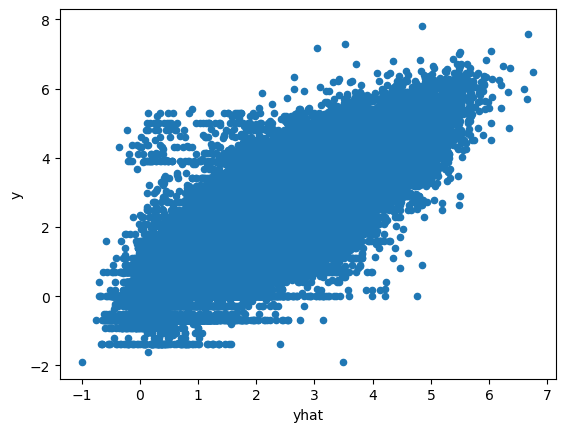

In [18]:
%matplotlib inline
df = pd.DataFrame({'y':y,'yhat':result.get_predicted_log_expenditures()})
df.plot.scatter(x='yhat',y='y')

That&rsquo;s all there is to estimation!  Note that we didn&rsquo;t estimate
demands for all goods&#x2014;lots of goods didn&rsquo;t have enough observations,
and were automatically dropped.



### Parameters



#### (Relative) Income Elasticity



Some of the parameters have an interesting interpretation.  First among these are the $\beta$ coefficients, which govern how *income elastic* different goods are (higher values means more elastic).  These are also called *Frisch elasticities*.
Here we use a plot to visualize, with confidence intervals.



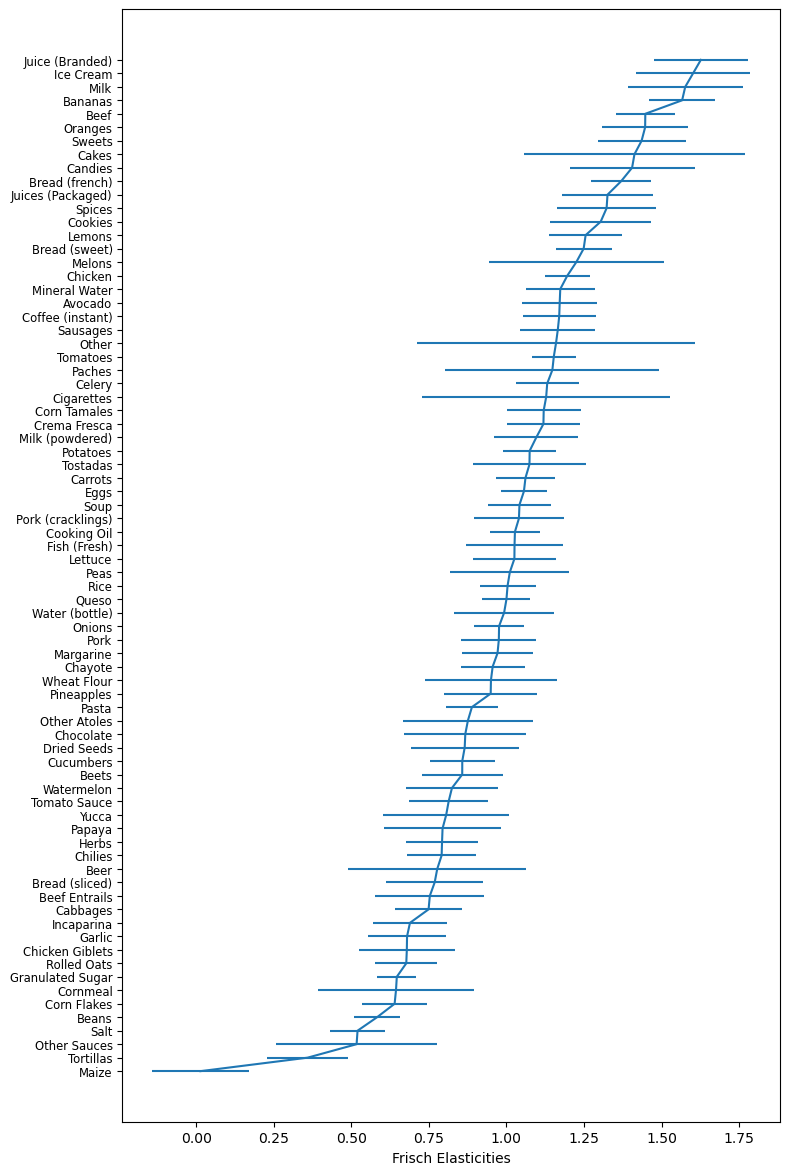

In [19]:
ax = result.graph_beta()

To just see the values of $\beta$:



In [20]:
result.get_beta()

j
Avocado           1.171807
Bananas           1.566468
Beans             0.583033
Beef              1.447775
Beef Entrails     0.753074
                    ...   
Tostadas          1.074332
Water (bottle)    0.992580
Watermelon        0.824400
Wheat Flour       0.950132
Yucca             0.805805
Name: beta, Length: 76, dtype: float64

#### Demand and Household Composition



We&rsquo;re particularly interested in the effects of household composition on demand.  These are captured by the $\gamma_j$ parameters in the regression.



In [21]:
result.get_gamma()

k,Males 00-03,Females 00-03,Males 04-08,Females 04-08,Males 09-13,Females 09-13,Males 14-18,Females 14-18,Males 19-30,Females 19-30,Males 31-50,Females 31-50,Males 51-99,Females 51-99,Constant
j,,,,,,,,,,,,,,,
Avocado,-0.088275,-0.122866,-0.027481,-0.049743,-0.011544,-0.028603,0.027512,0.000261,0.074529,0.161430,0.158562,0.298749,0.062668,0.063345,1.749162
Bananas,-0.115450,-0.145996,-0.055901,-0.048553,-0.030538,-0.031087,0.020161,0.029274,0.102862,0.200082,0.145734,0.281083,-0.011023,0.132700,2.601493
Beans,0.084385,0.060966,0.117293,0.090192,0.149595,0.105575,0.223101,0.136226,0.151246,0.094017,0.155123,0.098994,0.194210,0.128332,2.569973
Beef,-0.137689,-0.105542,-0.045396,-0.034741,-0.001552,-0.011293,0.048299,0.052845,0.159855,0.250684,0.237983,0.286949,0.059454,0.062816,4.194728
Beef Entrails,0.029093,-0.043311,-0.049139,0.016524,0.048557,0.067730,0.018645,0.094059,0.023180,0.163656,0.100741,0.096734,0.027478,0.029255,2.603261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tostadas,-0.104827,0.018316,-0.005392,0.065595,0.131417,0.026776,0.139571,0.060413,0.036817,0.108625,0.102481,0.105183,-0.017120,0.048025,2.129704
Water (bottle),-0.015467,-0.028098,-0.010616,-0.027088,-0.101461,-0.020004,-0.031444,0.001428,0.060548,0.050409,0.129648,0.256980,0.022353,0.138386,2.741034
Watermelon,0.024007,-0.021794,0.025018,-0.042928,-0.005028,0.076032,0.022955,0.081937,0.061462,0.124539,0.066374,0.153493,-0.003809,-0.024234,1.949779


#### Welfare



Another import quantity we estimate is $w_i$.  This is a welfare measure for the household.  Here&rsquo;s a histogram:



<Axes: ylabel='Density'>

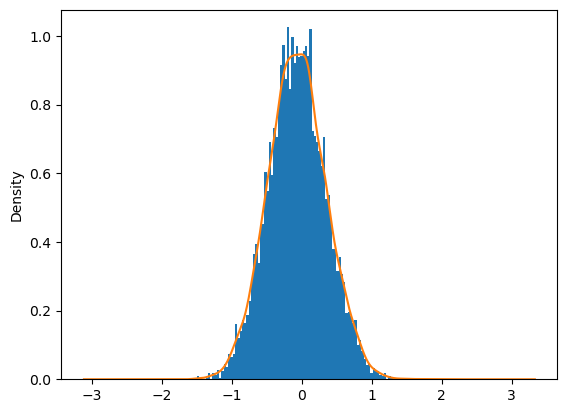

In [22]:
ax = result.get_w().plot.hist(bins=100,density=True)
result.get_w().plot.kde(ax=ax)

### Saving Result



You can save the estimated result, using something like



In [23]:
result.to_pickle('my_estimates.pickle')

You can subsequently load this using



In [24]:
import cfe
result = cfe.regression.read_pickle('my_estimates.pickle')

### Demand and Utility



Having estimated the demand system, we can examine the implied demand curves.



#### Budgets



Get food budget for all households, then find median budget:



In [25]:
import numpy as np

xhat = result.predicted_expenditures()

# Total food expenditures per household
xbar = xhat.groupby(['i','t','m']).sum()

# Reference budget
xref = xbar.quantile(0.5)  # Household at 0.5 quantile is median

#### Reference Prices



Choose reference prices.  Here we&rsquo;ll choose a particular year, and average prices across markets.  If you wanted to focus on particular market you&rsquo;d do this differently.



In [33]:
# Reference prices chosen from a particular time; average across place.
# These are prices per kilogram:
pbar = p.mean()
pbar = pbar[result.beta.index] # Only use prices for goods we can estimate

#Finally, define a function to change a single price in the vector $p$:
def my_prices(p0,p=pbar,j='Avocado'):
    """
    Change price of jth good to p0, holding other prices fixed.
    """
    p = p.copy()
    p.loc[j] = p0
    return p

#### Demand as a function of prices



Let&rsquo;s take a look at demand schedules for households with different budgets.



Text(0.5, 0, 'Quantities of Avocado Demanded')

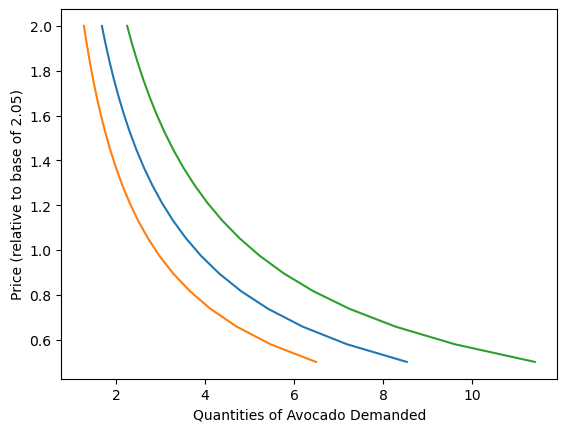

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

use = 'Avocado'  # Good we want demand curve for

# Vary prices from 50% to 200% of reference.
scale = np.linspace(.5,2,20)

# Demand for Avocado for household at median budget
plt.plot([result.demands(xref,my_prices(pbar[use]*s,pbar))[use] for s in scale],scale)

# Demand for Avocado for household at 25% percentile
plt.plot([result.demands(xbar.quantile(0.25),my_prices(pbar[use]*s,pbar))[use] for s in scale],scale)

# Demand for Avocado for household at 75% percentile
plt.plot([result.demands(xbar.quantile(0.75),my_prices(pbar[use]*s,pbar))[use] for s in scale],scale)

plt.ylabel(f"Price (relative to base of {pbar[use]:.2f})")
plt.xlabel(f"Quantities of {use} Demanded")

#### Engel Curves



Engel curves trace out how demand changes with budget:



Text(0.5, 1.0, 'Engel Curves')

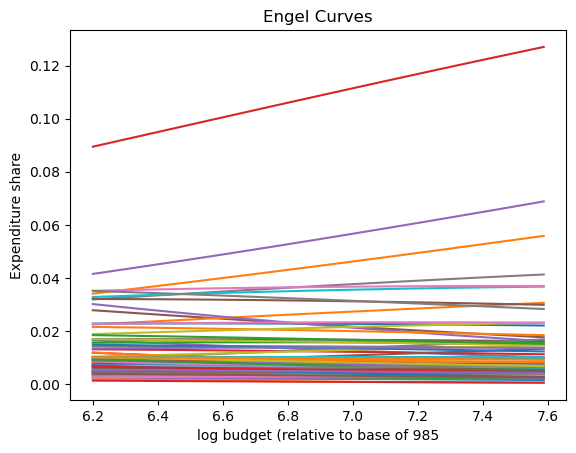

In [35]:
fig,ax = plt.subplots()

ax.plot(np.log(scale*xref),[result.expenditures(s*xref,pbar)/(s*xref) for s in scale])
ax.set_xlabel(f'log budget (relative to base of {xref:.0f}')
ax.set_ylabel(f'Expenditure share')
ax.set_title('Engel Curves')

#### Indirect Utility



We can also describe an indirect utility function that corresponds to these demands:



Text(0.5, 1.0, 'Indirect Utility Function')

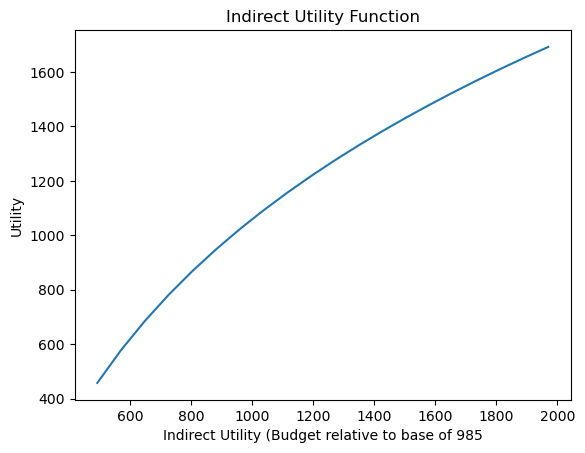

In [36]:
fig,ax = plt.subplots()

ax.plot(scale*xref,[result.indirect_utility(s*xref,pbar) for s in scale])
ax.set_xlabel(f'Indirect Utility (Budget relative to base of {xref:.0f}')
ax.set_ylabel(f'Utility')
ax.set_title('Indirect Utility Function')